In [111]:
import random
import pandas as pd
import numpy as np

from collections import defaultdict, Counter
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import combinations, izip
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import KMeans
from scipy.spatial.distance import euclidean
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram



#Unsupervised Learning
#####two main methods

###1) K-Means
    - good as pre-processing for supervised learning
    - good to understand features

###2) Heirchical 
    - don't choose K. 
    - build nested clusters: Dendogam. use to get cluster by break point.
    
    
###How to choose K? 
####3 Popular Methods:
    A) Elbow Method - 
        Choose a number of clusters so that adding doesn't reduce the SSE (sum of squared errrors) by much. Increase K until you reach en elbow point in the plot of within-cluster varaiation against the number of clusters. See indiviual ssignment for originalcode.
    B) GAP statistic : arguabley best method!!
    C) Silohette coefieccitn (less explicit)**see below for sklearn

###B) GAP Statistics
Compare the within cluster scatter W1,..Wk to uniformly distributed rectantle containg data. Find the largest gap.

```
1) Get the observed vs Expected value of log (Wk) over 20 simulations of uniform data
2) Translate curves so that log(Wk) = 0 for k=1
3) Gap statistic K* is smallest K produced gap within one standard deviation of gap at K+1
```

###C) Choose K with Siloutte Method:
a higher Silhouette Coefficient score relates to a model with better defined clusters. The Silhouette Coefficient is defined for each sample and is composed of two scores
```
GUIDELINES FOR EVALUATING AVG SILHOUETTE
0.71-1: Strong STructure. .51-7: Reasonable structure. .25-.5: Structure/weak, artiifical. <.025, no substantal strature
```
This example is with a Kmeans cluster (see below for more isntructions)

In [99]:
from sklearn.metrics import silhouette_score

#fit the data like before, 
k_means = KMeans(n_clusters=3)
k_means.fit(X_iris)  #fit it with X 

#then get the siloutee score from the generated labels with the given k
labels = k_means.labels_
silhouette_score(X_iris, labels)  #evaluate on the labels from the k_means

0.55259194454997551

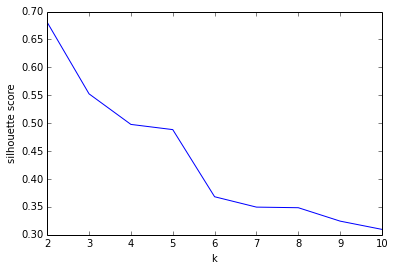

In [101]:
#an example plot to find the best score!

def plot_k_silhouette(X):
    k_values = range(2, 11)
    silhouette_scores = []
    for k in k_values:
        k_means = KMeans(n_clusters=k)
        k_means.fit(X_iris) 
        labels = k_means.labels_
 
        silhouette_scores.append(silhouette_score(X, labels))

    plt.plot(k_values, silhouette_scores)
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.show()
    
plot_k_silhouette(X_iris)

#the real answer for the data is 3! There are three categories of iris. 

#1) K-Means

####Goal: Minimize the inter-cluster variation.
Assigned each of n data poitns to one of K clusters, to minimize 'within cluster variation. K^n choices. woah!

####Basic Algorithm:
1) randomly assign a number from 1 to K to each data point

2) Repeat until cluster assignments stable: (K-means ++ algorithm)
- For each of K clusters, computer a cluster cetroid, by taking a vector of p feature means

- Assign a data point to cluster for which centroid is closest (Euclidian distance)
- Update the centroids to be the new center of all the points in that cluster(just take the arithmetic mean)

#####More detail on choosing the centroid (#1 above): 
 K ++ means, a little smarter:
```
Choose one centroid at random.
Repeat until all centroids have been chosen:
- For each datapoint, compute the distance from x to all the centroids thathave been chosen so far. Find the minimum distance, call it D(x).
- Choose the next centroid at random, using a weighted probability distribution where a point is chosen with probability proportional to D(x)^2.
```

In [102]:
from sklearn import cluster, datasets

#first get some data for demonstration
iris = datasets.load_iris()
X_iris = iris.data

###kmeans in sklearn:

In [103]:
k_means = KMeans(n_clusters=3)
k_means.fit(X_iris)  #fit it with X 

#get the cluster centers!
cluster_centers = k_means.cluster_centers_
print 'Cluster Centers: \n', cluster_centers

#get the labels that it determined
print 'Labels: \n', k_means.labels_


Cluster Centers: 
[[ 5.006       3.418       1.464       0.244     ]
 [ 5.9016129   2.7483871   4.39354839  1.43387097]
 [ 6.85        3.07368421  5.74210526  2.07105263]]
Labels: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


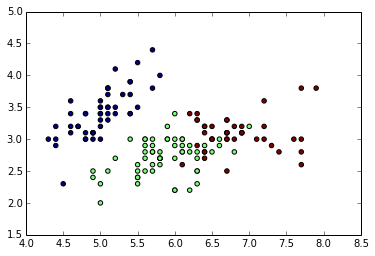

In [104]:
#humble example plot with just two dimensions. There are more.
def plot_data_2d(X, labels):
    plt.scatter(X[:, 0], X[:, 1], c=labels)

plot_data_2d(X_iris[:,:2], k_means.labels_)



In hierarchical clustering, unlike K-means, you don't have to choose a K a priori. You can cut your dendrogram at various points, corresponding to different K, and then use any of the methods above to measure how good K is. A single dendrogram provides choices of K=1 up to K=n

#Hierachical Clustering

######Basic Algorithm:
```
1) Each point is a cluster
2) Merge closest clusters
3) end when all points form a cluster
```
Use the height of fusion to tell how close clusters are.

######Distance Between Clusters
```
1) Average Linkage
    not sensitive to outliers. In the middle
    'Mean intercluster dissimilarity. Computer al lpairwise disimilarities between observations in cluster A and observations in cluster B, and record the AVERAGE of these dissimilarities.'
    
2) Complete Linkage
    Less sensitive to outliers. May violate 'closeness'
    'Maximal intercluster disimilarity. Computer all pairwise dissimilarities between ob in cluster A and cluster B, and regord the LARGEST of the dissimilarities. 
    
3) Single Linkage
    More sensitive to outliers. Handels irregualr shapes well
    ' Minimal intercluster dissimilarity. Computer all pairwise dissimilarities between obs in clsuter A and B, record the SMALLEST of these dissimilarities. Single linkage can result in extended, trailing clusters where single observations are fused one-at-a-time.
    
4) Centroid
```



#####Example code:
Hierarchical clustering is more computationally intensive than Kmeans. Also it is hard to visualize the results of a hierarchical clustering if you have too much data (since it represents its clusters as a tree). Create a subset of the original articles by filtering the data set to contain at least one article from each section and at most around 200 total articles.

One issue with text (especially when visualzing/clustering) is high dimensionality. Any method that uses distance metrics is susceptible to the curse of dimensionality. scikit-learn has some utility to do some feature selection for us on our bags.

In [115]:
# 1.  Create a subset of the original articles by filtering the data set to
# contain at least one article from each section and at most around 200 total
# articles.
small_mask = np.zeros(len(articles_df)).astype(bool)
indices = np.arange(len(articles_df))
for category in articles_df['section_name'].unique():
    category_mask = (articles_df['section_name']==category).values
    new_index = np.random.choice(indices[category_mask])
    small_mask[new_index] = True
additional_indices = np.random.choice(indices[np.logical_not(small_mask)],
                                      100 - sum(small_mask),
                                      replace=False)
small_mask[additional_indices] = True
small_df = articles_df.ix[small_mask]


The first step to using scipy's Hierarchical clustering is to first find out how similar our vectors are to one another. To do this we use the pdist function to compute a similarity matrix of our data (pairwise distances). First we will just use Euclidean distance. A quirk of pdist is that it returns one looong vector. Use scipy's squareform function to get our long vector of distances back into a square matrix. Look at the shape of this new matrix.

In [118]:
# first vectorize...
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
small_X = vectorizer.fit_transform(small_df['content'])
small_features = vectorizer.get_feature_names()

# now get distances
from scipy.spatial.distance import pdist, squareform
distxy = squareform(pdist(small_X.todense(), metric='cosine'))


Now that we have a square similarity matrix we can start to cluster! Pass this matrix into scipy's linkage function to compute our hierarchical clusters.

In [120]:
link = linkage(distxy, method='complete')

We in theory have all the information about our clusters but it is basically impossible to interpret in a sensible manner. Thankfully scipy also has a function to visualize this madness. Using scipy's dendrogram function plot the linkages as a hierachical tree.

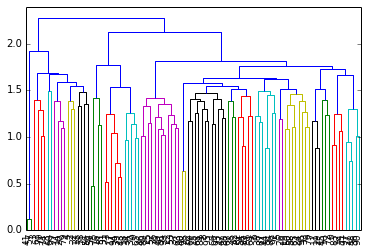

In [121]:
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9)
plt.show()

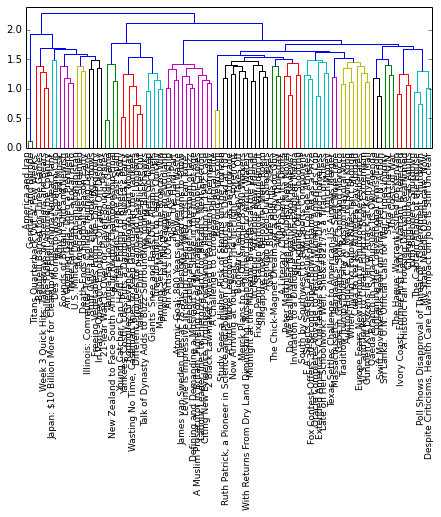

In [122]:
## HIERARCHICAL TOPICS
# 1. To make your clusters more interpretable, change the labels on the data
# to be the titles of the articles.
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=small_df['headline'].values)
# fix spacing to better view dendrogram and the labels
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
plt.show()

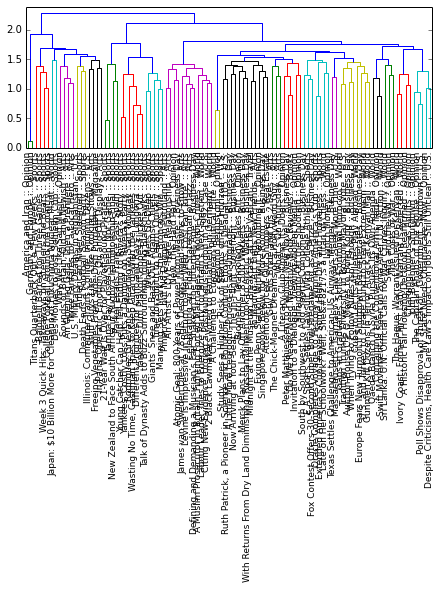

In [123]:
# 2. Label each point with the title and the section.

labels = (small_df['headline'] + ' :: ' + small_df['section_name']).values
dendro = dendrogram(link, color_threshold=1.5, leaf_font_size=9,
                    labels=labels)
# fix spacing to better view dendrogram and the labels
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
plt.show()

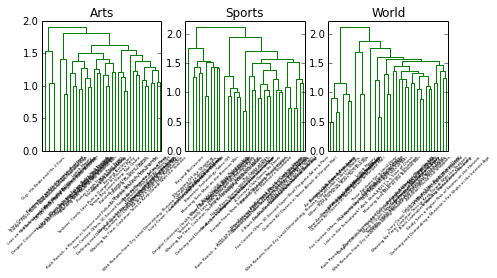

In [124]:
# 3. Explore different clusters on a per section basis.
for i, category in enumerate(['Arts', 'Sports', 'World']):
    cat_indices = articles_df[articles_df['section_name']==category].index
    indices = np.random.choice(cat_indices, 40)
    cat_df = articles_df.ix[indices]
    vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
    cat_X = vectorizer.fit_transform(cat_df['content'])
    distxy = squareform(pdist(cat_X.todense(), metric='cosine'))
    ax = plt.subplot(1, 3, i + 1)
    dendro = dendrogram(linkage(distxy, method='complete'),
                        color_threshold=4,
                        leaf_font_size=4,
                        labels=small_df['headline'].values)
    ax.set_title(category)
plt.subplots_adjust(top=.95, bottom=0.5, left=0.05, right=0.99)
plt.show()


Repeat this process using cosine similarity (and if you have time, Pearson correlation and the Jaccard distance). Read about scipys distance metrics here. Why might cosine distance be better for clustering the words of our articles?

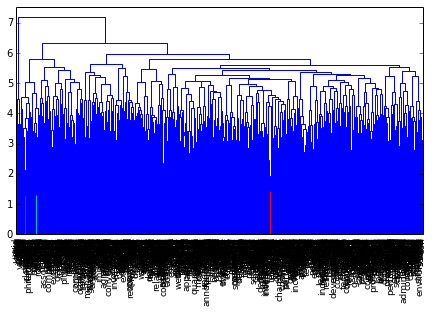

In [125]:
# 7. Perform the same analysis as above and inspect the dendrogram with the
# words from the articles.
distxy_words = squareform(pdist(small_X.T.todense(), metric='cosine'))
dendro = dendrogram(linkage(distxy_words, method='complete'),
                    color_threshold=1.5, leaf_font_size=9,
                    labels=small_features)
plt.subplots_adjust(top=.99, bottom=0.2, left=0.05, right=0.99)
plt.show()

#KMeans Example 2

In [106]:
# 1. Apply k-means clustering to the articles.pkl
#this gives a TFIDF 
articles_df = pd.read_pickle("data/articles.pkl")
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names()

kmeans = KMeans()
kmeans.fit(X)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=8, n_init=10,
    n_jobs=1, precompute_distances=True, random_state=None, tol=0.0001,
    verbose=0)

In [107]:
# 3. Find the top 10 features for each cluster.
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(features[i] for i in centroid))

top features for each cluster:
0: sept, editor, 2013, school, gun, child, new, teacher, sex, student
1: republican, health, house, government, care, shutdown, obama, law, senate, mr
2: mr, said, ms, new, year, art, like, music, work, time
3: game, team, season, said, yard, player, cup, league, touchdown, coach
4: said, attack, syria, government, killed, official, police, chemical, united, people
5: iran, rouhani, iranian, nuclear, mr, obama, israel, united, netanyahu, president
6: said, company, percent, mr, year, government, china, state, bank, new
7: yankee, rivera, game, inning, season, pettitte, run, hit, said, team


In [108]:
# 4. Limit the number of features and see if the words of the topics change.
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(articles_df['content'])
features = vectorizer.get_feature_names()

kmeans = KMeans()
kmeans.fit(X)
top_centroids = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
print "top features for each cluster with 1000 max features:"
for num, centroid in enumerate(top_centroids):
    print "%d: %s" % (num, ", ".join(features[i] for i in centroid))

top features for each cluster with 1000 max features:
0: mr, music, art, ms, new, work, like, night, series, film
1: iran, nuclear, mr, obama, united, president, said, nation, state, speech
2: game, season, team, said, player, league, yard, play, coach, run
3: said, attack, police, official, government, people, syria, killed, united, military
4: mr, said, court, judge, state, party, case, government, year, official
5: said, company, percent, year, new, state, sept, government, people, million
6: republican, house, senate, government, health, mr, obama, care, shutdown, party
7: cup, race, team, championship, second, champion, tour, world, title, victory


In [109]:
# 5. Print out the titles of a random sample of the articles assigned to each
# cluster to get a sense of the topic.
assigned_cluster = kmeans.transform(X).argmin(axis=1)
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    sample_articles = np.random.choice(cluster, 3, replace=False)
    print "cluster %d:" % i
    for article in sample_articles:
        print "    %s" % articles_df.ix[article]['headline']

cluster 0:
    24 Recipients of MacArthur ‘Genius’ Awards Named
    What’s on Friday
    ‘An Education in Equality’
cluster 1:
    Short of a Deal, Containing Iran Is the Best Option
    Discussing Iran, Obama and Netanyahu Display Unity
    Netanyahu Is Said to View Iran Deal as a Possible Trap
cluster 2:
    Mets Lose to Reds, but Eye the Future
    Where Indie Game Producers Come Out to Play
    Chiefs Deflate Giants’ Momentum, Sending Them to Another Loss
cluster 3:
    100, 75, 50 Years Ago
    Rebels in Mali Suspend Peace Deal With Government
    Impotence Over Syria?
cluster 4:
    Britain Plans to Require Community Service for Long-Term Unemployment Benefits
    Risk-Averse Gandhi’s Move Rattles Indian Election
    Nigeria’s Long Emergency
cluster 5:
    With Inflation Low, the European Central Bank Holds Rates Steady 
    Nielsen Deal For Arbitron Is Complete 
    F.D.A. to Require Tracking Codes in Medical Devices
cluster 6:
    Senate Action on Health Law Moves to Brink of S

In [112]:
# 7. If you set k == to the number of NYT sections in the dataset, does it
# return topics that map to a section?
kmeans = KMeans(n_clusters=10)
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print "top 2 topics for each cluster"
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = articles_df.ix[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
    print "Cluster %d: %s" % (i, most_common[0][0]),
    if len(most_common) > 1:
        print " %s" % (most_common[1][0]),
    print

top 2 topics for each cluster
Cluster 0: World  Opinion
Cluster 1: Sports  Opinion
Cluster 2: Sports  Business Day
Cluster 3: Business Day  World
Cluster 4: World  Business Day
Cluster 5: U.S.  Business Day
Cluster 6: Sports  Opinion
Cluster 7: Arts  Business Day
Cluster 8: Sports  World
Cluster 9: World  Opinion


In [114]:
# 8. Try clustering with a subset of the sections.
mask = np.logical_or(
       np.logical_or((articles_df['section_name']=='Sports').values,
                     (articles_df['section_name']=='Arts').values),
                     (articles_df['section_name']=='Business Day').values)
three_articles_df = articles_df[mask]
kmeans = KMeans(n_clusters=3)
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(three_articles_df['content'])
kmeans.fit(X)
assigned_cluster = kmeans.transform(X).argmin(axis=1)
print "top 2 topics for each cluster"
for i in range(kmeans.n_clusters):
    cluster = np.arange(0, X.shape[0])[assigned_cluster==i]
    topics = three_articles_df.ix[cluster].dropna()['section_name']
    most_common = Counter(topics).most_common()
    print "Cluster %d: %s" % (i, most_common[0][0]),
    if len(most_common) > 1:
        print " %s" % (most_common[1][0]),
    print

top 2 topics for each cluster
Cluster 0: Sports  Arts
Cluster 1: Sports  Arts
Cluster 2: Sports  Arts
